In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

os.chdir(os.path.dirname(os.getcwd()))      # Move to parent directory

from utils import compute_difficulty_index, compute_bmi


## ```cyclists``` dataset

In [2]:
cyclists_df = pd.read_csv('dataset/cyclists_outlier.csv')

In [3]:
print(cyclists_df.columns)

Index(['_url', 'name', 'birth_year', 'nationality', 'cyclist_experience',
       'experience_cat', 'continent', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'min_relative_position', 'avg_performance_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std', 'top_cyclists'],
      dtype='object')


In [4]:
numeric_columns = cyclists_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'min_relative_position', 'avg_performance_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

Take only numerical columns 

In [5]:
# Specifica le colonne da mantenere
columns_to_keep = ["avg_relative_position", "relative_position_std", "career_level"]

# Crea un nuovo dataset con solo le colonne specificate
all_cyclists_df = cyclists_df
cyclists_df = cyclists_df[columns_to_keep]


Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
cyclist_normalized_df = scaler.transform(cyclists_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(cyclists_df)), columns=cyclists_df.columns)



,avg_relative_position,relative_position_std,career_level
0,0.456286,0.243635,0.918577
1,0.630686,0.205735,-0.564982
2,0.557360,0.219011,-0.112376
3,0.464642,0.238795,-0.494242
4,0.589817,0.238517,-0.141179
...,...,...,...
4224,0.510309,0.340690,-0.487705
4225,0.637519,0.215697,-0.585403
4226,0.697735,0.150866,-0.593267
4227,0.413682,0.238513,-0.293226


### **K-menas** of cyclists dataset 

### **Best k**

In [7]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(cyclists_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 1071.135862371607
k: 3, SSE: 502.45143975966187
k: 4, SSE: 307.3747940768963
k: 5, SSE: 216.05142020009123
k: 6, SSE: 163.12646087091338
k: 7, SSE: 130.6425240816693
k: 8, SSE: 109.10569537181523
k: 9, SSE: 93.72518859238559
k: 10, SSE: 81.8388913930649
k: 15, SSE: 50.22823728958453
k: 20, SSE: 38.31851139826561


In [8]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 1071.135862371607
Separation 0.5143306521628364
Silhouette 0.7538614043201097
for k = 3
SSE 502.45143975966187
Separation 0.5093060950080482
Silhouette 0.6950383766286943
for k = 4
SSE 307.3747940768963
Separation 0.5350191676604162
Silhouette 0.6296952217055352
for k = 5
SSE 216.05142020009123
Separation 0.5761810686646266
Silhouette 0.5552618395761474
for k = 6
SSE 163.12646087091338
Separation 0.5979942006452402
Silhouette 0.5120251319487722
for k = 7
SSE 130.6425240816693
Separation 0.6065697036768091
Silhouette 0.49708842550951343
for k = 8
SSE 109.10569537181523
Separation 0.6873212756624448
Silhouette 0.4039284483562274
for k = 9
SSE 93.72518859238559
Separation 0.7072687618347845
Silhouette 0.38439250521210505
for k = 10
SSE 81.8388913930649
Separation 0.6782920674688337
Silhouette 0.3858245768466803
for k = 15
SSE 50.22823728958453
Separation 0.7521494750792141
Silhouette 0.3389551054679715
for k = 20
SSE 38.31851139826561
Separation 0.8306838482684086
Silhouette

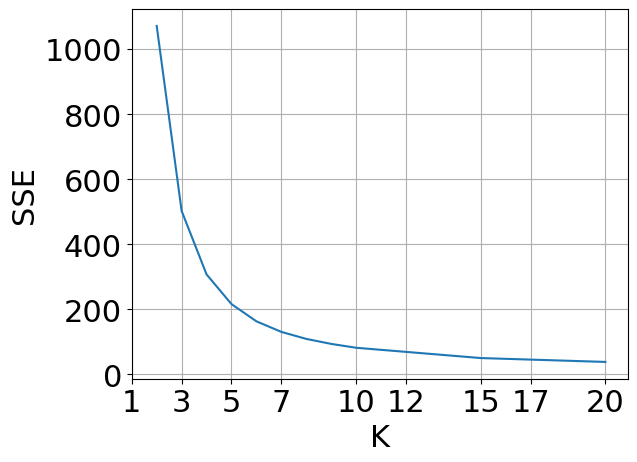

In [9]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


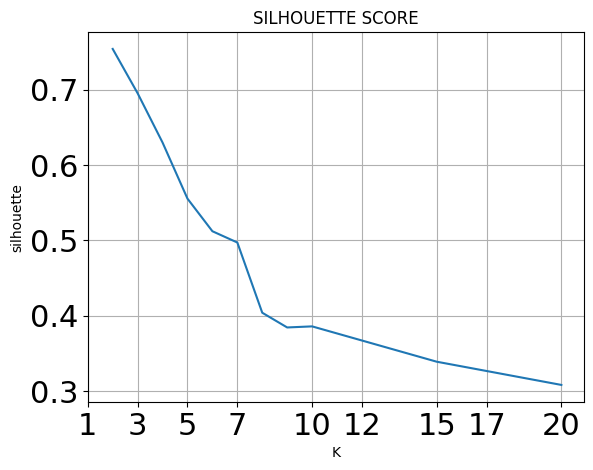

In [10]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

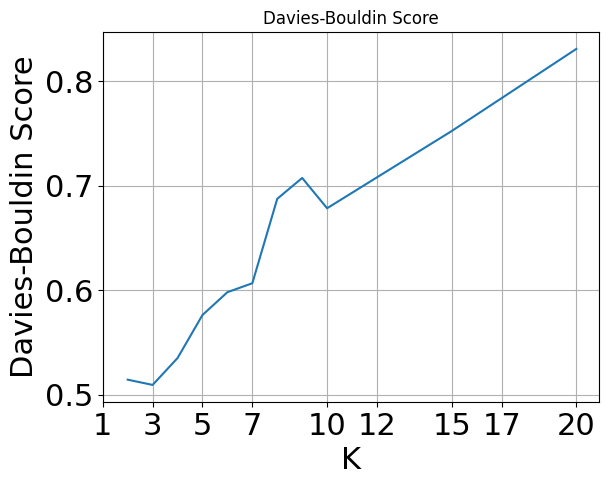

In [11]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

### **K-means resuslts** (cyclists dataset)

In [12]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(cyclist_normalized_df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [13]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1419, 2256, 554]


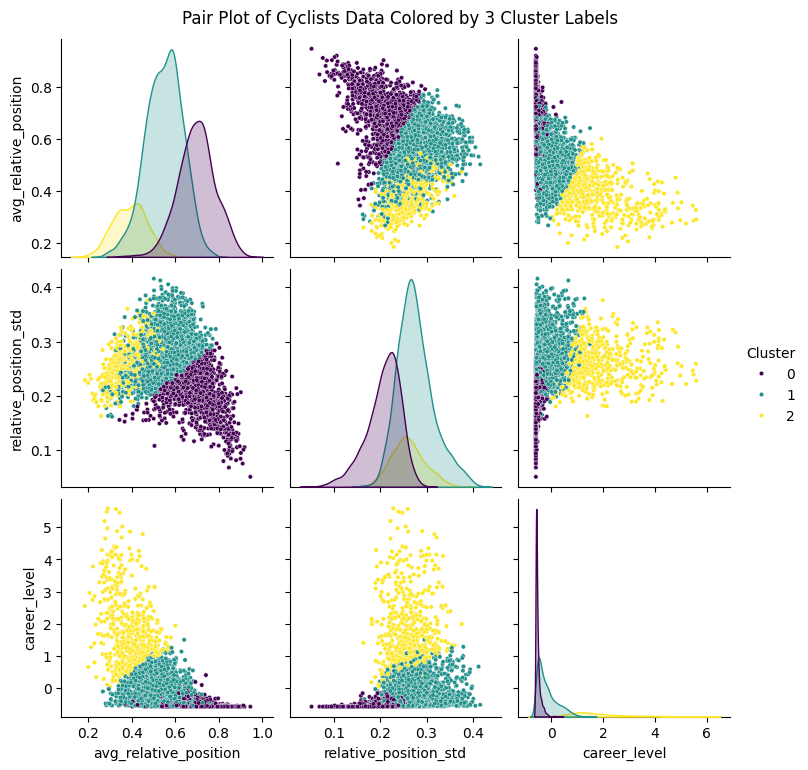

In [14]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

all_cyclists_df = all_cyclists_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10})
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



Based on the pair plot the culstering result better is chosen 

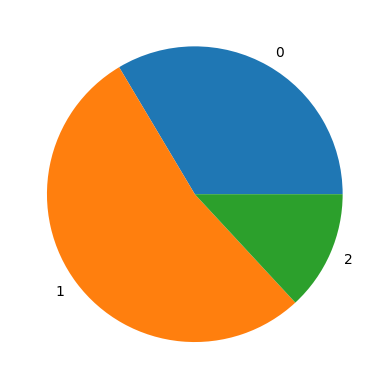

In [15]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### Characterization based on top cyclists column

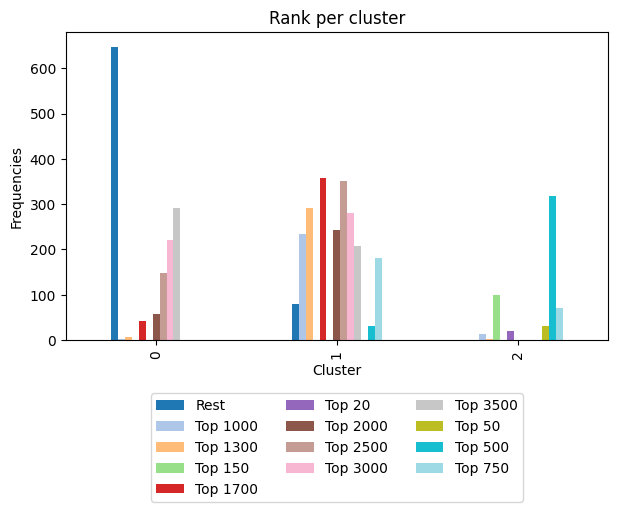

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_cyclists_df['top_cyclists'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


#### Radar plot

0
1
2


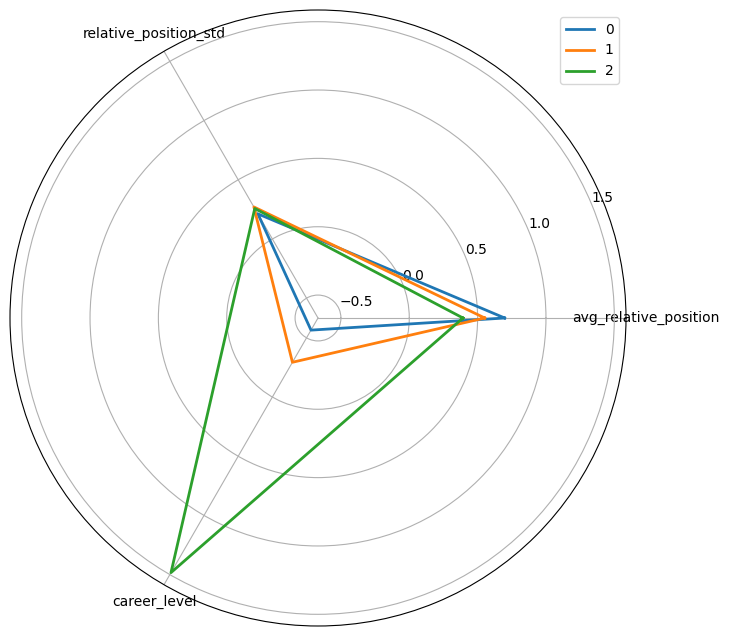

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(cyclists_df.columns)
plt.figure(figsize=(8, 8))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

## ```races``` dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

os.chdir(os.path.dirname(os.getcwd()))      # Move to parent directory

os.getcwd()



'/Users/francesco/Desktop/unipi/MAGISTRALE/2_ANNO/data_mining/dm-2425'

In [2]:
races_df = pd.read_csv('dataset/races_outlier.csv')

In [3]:
races_df.columns

Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'is_tarmac', 'start_date', 'duration',
       'cyclist_number', 'avg_cyclists_level', 'average_age',
       'race_importance', 'top_races', 'difficulty_idx', 'top_complex_races',
       'season', 'avg_slope', 'min_duration', 'duration_to_length',
       'real_name', 'startlist_entropy', 'points_entropy',
       'difficulty_index_2'],
      dtype='object')

In [4]:
numeric_columns = races_df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['points', 'length', 'climb_total', 'profile', 'startlist_quality',
       'cyclist_number', 'avg_cyclists_level', 'average_age',
       'race_importance', 'difficulty_idx', 'avg_slope', 'min_duration',
       'duration_to_length', 'startlist_entropy', 'points_entropy',
       'difficulty_index_2'],
      dtype='object')

### **Clustering Preprocessing - Normalization**

In [5]:
# columns_preserve = ['startlist_quality', 'avg_cyclists_level', 'race_importance']     SIMONELLI
columns_preserve = ["climb_total", "length", "duration_to_length"]



all_races_df = races_df
# Create a new dataset with only the specified columns
races_df = races_df[columns_preserve]

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(races_df)
races_normalized_df = scaler.transform(races_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(races_df)), columns=races_df.columns)



,climb_total,length,duration_to_length
0,3300.0,256500.0,0.9183
1,3500.0,251800.0,0.9421
2,3495.0,251400.0,0.9211
3,3558.0,258000.0,0.9112
4,3320.0,248700.0,0.9121
...,...,...,...
2520,2978.0,187200.0,0.8185
2521,4120.0,181200.0,0.9205
2522,3359.0,190000.0,0.8557
2523,3741.0,153400.0,0.9599


### **K-means** for reaces dataset

### **Best K**

In [7]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(races_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 2555403994178.719
k: 3, SSE: 1099070657328.3082
k: 4, SSE: 646256483125.5739
k: 5, SSE: 423849474294.42993
k: 6, SSE: 315153532224.2344
k: 7, SSE: 245596162304.2954
k: 8, SSE: 179805498996.2235
k: 9, SSE: 138716590409.11234
k: 10, SSE: 119635293500.12283
k: 15, SSE: 53544120545.45741
k: 20, SSE: 32115751107.132725


In [8]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 2555403994178.719
Separation 0.3587481712049415
Silhouette 0.734466377197773
for k = 3
SSE 1099070657328.3082
Separation 0.510444627474378
Silhouette 0.5630150788960281
for k = 4
SSE 646256483125.5739
Separation 0.5086388088944742
Silhouette 0.5473444161181695
for k = 5
SSE 423849474294.42993
Separation 0.5101713599949556
Silhouette 0.5487440533084301
for k = 6
SSE 315153532224.2344
Separation 0.5039595311361857
Silhouette 0.5337986260363841
for k = 7
SSE 245596162304.2954
Separation 0.496918481376475
Silhouette 0.5376670447631434
for k = 8
SSE 179805498996.2235
Separation 0.5220079410420809
Silhouette 0.5254534526346192
for k = 9
SSE 138716590409.11234
Separation 0.5173721740102639
Silhouette 0.5319439333666155
for k = 10
SSE 119635293500.12283
Separation 0.5314121406664377
Silhouette 0.5103784689210515
for k = 15
SSE 53544120545.45741
Separation 0.5134202951630891
Silhouette 0.5175709812540382
for k = 20
SSE 32115751107.132725
Separation 0.5366293390085954
Silhouette 0.

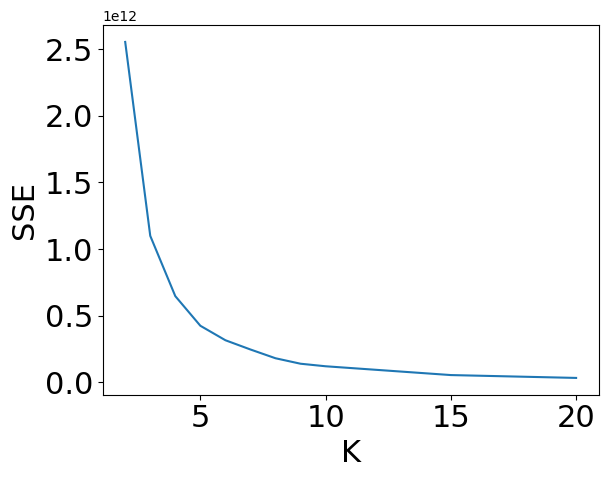

In [9]:

sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.show()

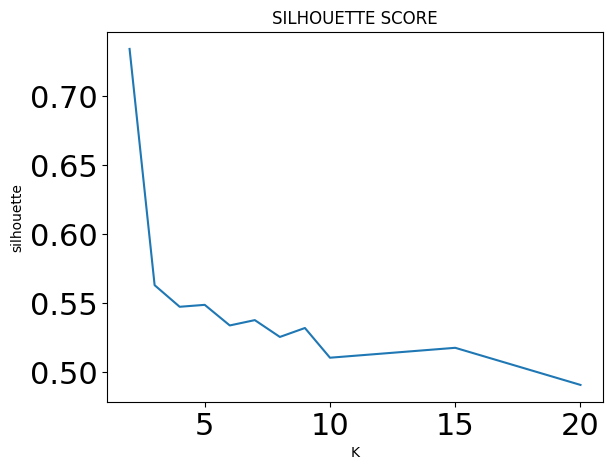

In [10]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
#plt.axvline(6)
plt.show()

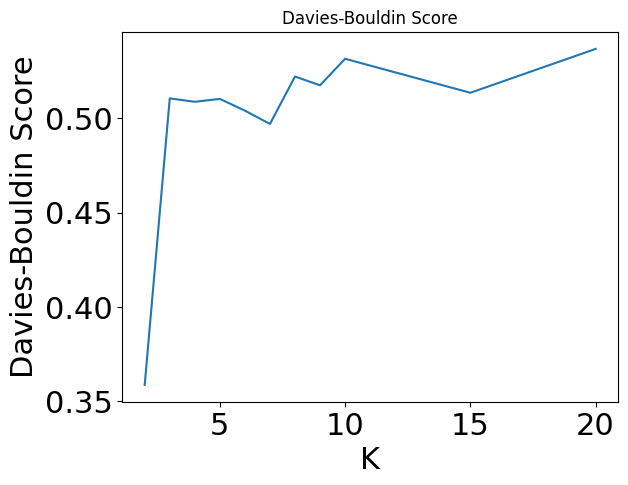

In [11]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.show()

### **K-means resuslts** (races datastet)

In [12]:
#RETRAIN BEST K-MEANS
best_k = 2
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(races_normalized_df)

KMeans(max_iter=1000, n_clusters=2, random_state=0)

In [13]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1184, 1341]


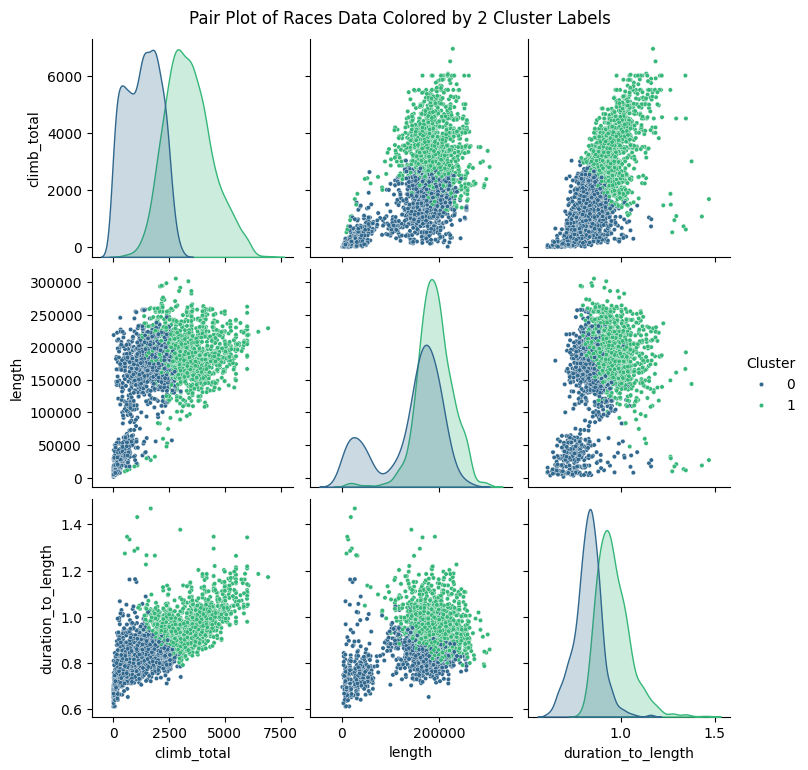

In [14]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(races_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10})
plt.suptitle(f'Pair Plot of Races Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()

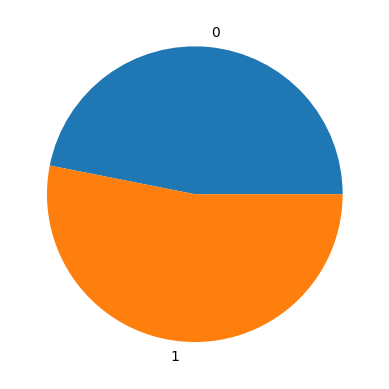

In [15]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### Characterization based on ```top_complex_races``` column

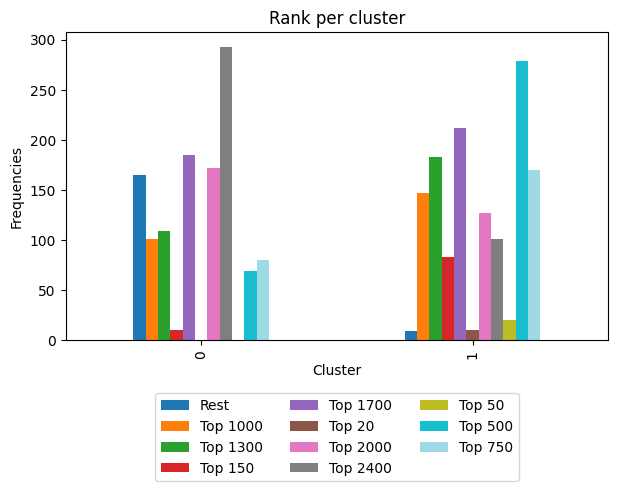

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_races_df['top_complex_races'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


#### Radar plot

0
1


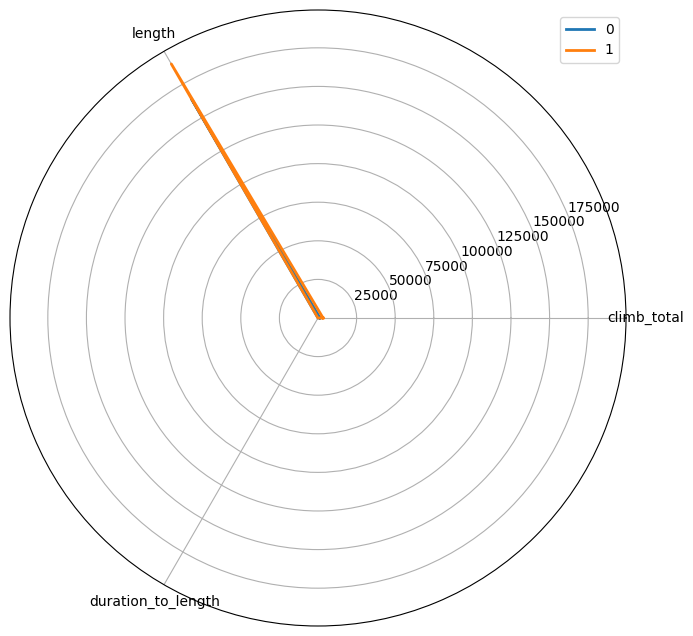

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(races_df.columns)
plt.figure(figsize=(8, 8))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = races_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], races_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()